In [15]:
# setup
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime as dt, date
import scipy.stats as st


In [16]:
#read sample csv
cc_data = pd.read_csv(r"C:\Users\corym\OneDrive\Documents\Data_Analytics_Bootcamp\GIT\Project_1_Group_3\cc_data.csv")
cc_data.head()

,Unnamed: 0,trans_date_trans_time,category,amt,city,state,lat,long,city_pop,dob,merch_lat,merch_long,gender
0,527442,2020-09-12 04:29:58,shopping_net,4.94,Darien,GA,31.3826,-81.4312,5989,1967-05-05,32.260016,-81.794484,F
1,538511,2020-09-17 18:28:09,shopping_pos,4.38,Mill Creek,PA,40.4679,-77.8967,1334,1986-12-17,39.472619,-78.244576,F
2,37539,2019-04-14 17:46:09,home,55.26,Centerview,MO,38.7897,-93.8702,2368,1989-07-17,39.199107,-93.423308,NaN
3,350429,2020-06-25 16:26:23,kids_pets,48.95,Indianapolis,IN,39.8490,-86.2720,910148,1975-11-30,39.685401,-87.064198,F
4,561460,2020-09-29 17:18:42,shopping_pos,348.15,Wilmington,NC,34.2651,-77.8670,186140,1983-02-08,34.268060,-78.504405,F


In [17]:
#isolate Birth Year
cc_data["dob"] = pd.to_datetime(cc_data["dob"])

cc_data['Birth Year'] = cc_data["dob"].dt.year.astype(int)

cc_data.head()

,Unnamed: 0,trans_date_trans_time,category,amt,city,state,lat,long,city_pop,dob,merch_lat,merch_long,gender,Birth Year
0,527442,2020-09-12 04:29:58,shopping_net,4.94,Darien,GA,31.3826,-81.4312,5989,1967-05-05,32.260016,-81.794484,F,1967
1,538511,2020-09-17 18:28:09,shopping_pos,4.38,Mill Creek,PA,40.4679,-77.8967,1334,1986-12-17,39.472619,-78.244576,F,1986
2,37539,2019-04-14 17:46:09,home,55.26,Centerview,MO,38.7897,-93.8702,2368,1989-07-17,39.199107,-93.423308,NaN,1989
3,350429,2020-06-25 16:26:23,kids_pets,48.95,Indianapolis,IN,39.8490,-86.2720,910148,1975-11-30,39.685401,-87.064198,F,1975
4,561460,2020-09-29 17:18:42,shopping_pos,348.15,Wilmington,NC,34.2651,-77.8670,186140,1983-02-08,34.268060,-78.504405,F,1983


In [18]:
#isolate generation data
silgen_list = []
boomer_list = []
genx_list = []
mill_list = []
genz_list = []
for i in cc_data["Birth Year"]:
    if i >= 1928 and i <= 1945:
        silgen_list.append(i)
    elif i >=1946 and i <= 1964:
        boomer_list.append(i)
    elif i >=1965 and i <= 1980:
        genx_list.append(i)
    elif i >=1981 and i <= 1996:
        mill_list.append(i)
    elif i >=1997 and i <=2010:
        genz_list.append(i)


In [19]:
#convert lists to int format to get counts
silgen_list = pd.Series(silgen_list).astype(int)
silgen_count = silgen_list.count()

boomer_list = pd.Series(boomer_list).astype(int)
boomer_count = boomer_list.count()

genx_list = pd.Series(genx_list).astype(int)
genx_count = genx_list.count()

mill_list = pd.Series(mill_list).astype(int)
mill_count = mill_list.count()

genz_list = pd.Series(genz_list).astype(int)
genz_count = genz_list.count()

In [20]:
#create DF of Generation Counts
generationcountdf = pd.DataFrame({"Silent":[silgen_count], "Baby Boomer": [boomer_count], "X": [genx_count], "Millenial": [mill_count], "Z":[genz_count]})
generationcountdf

,Silent,Baby Boomer,X,Millenial,Z
0,824,1898,3324,3223,662


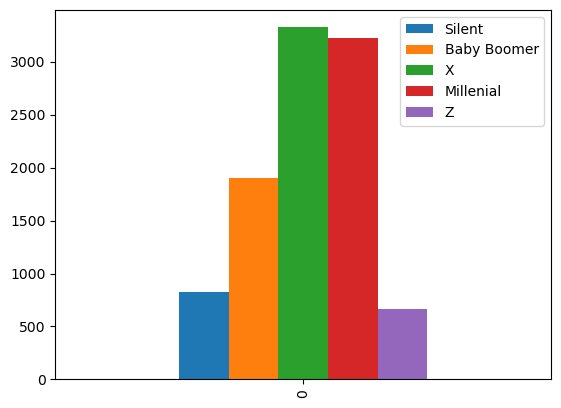

In [21]:
#create bar plot of generation data
generationbar = generationcountdf.plot.bar()

In [22]:
#testing for null data
nulltest = cc_data.isnull().values.any()
nulltest


True

In [23]:
#create scatter plot of age and fraud ammounts
cc_data['age'] = 2024 - cc_data['Birth Year']



The correlation between age and transaction amounts is 0.01.


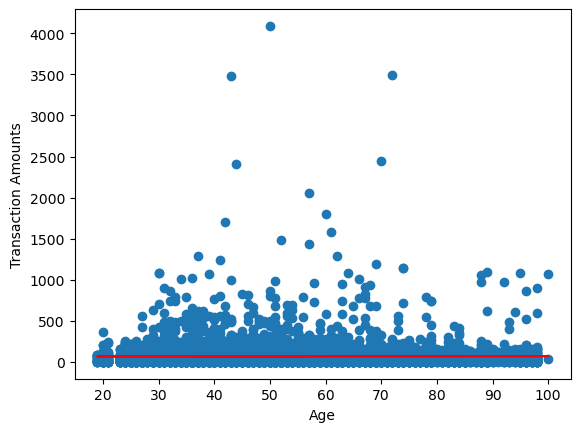

In [24]:
Age = cc_data['age']
Amount = cc_data['amt']
correlation = st.pearsonr(Age, Amount)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(Age, Amount)
regression = Age * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(Age, Amount)
plt.plot(Age,regression,"r-")
plt.xlabel("Age")
plt.ylabel("Transaction Amounts")
print(f"The correlation between age and transaction amounts is {round(correlation[0], 2)}.")
plt.show()

The correlation between City Population and transaction amounts is 0.01.


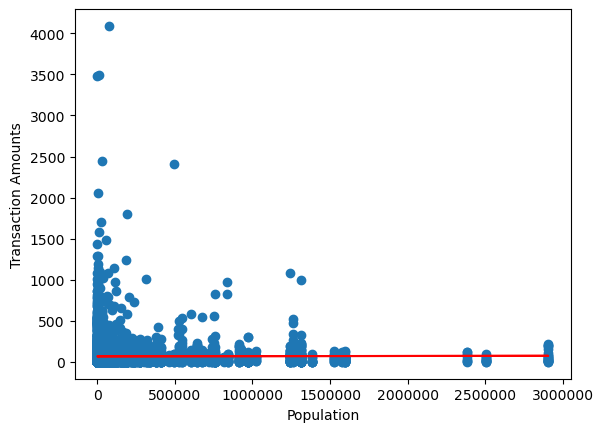

In [25]:
pop = cc_data['city_pop']
Amount = cc_data['amt']
correlation = st.pearsonr(pop, Amount)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(pop, Amount)
regression = pop * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(pop, Amount)
plt.plot(pop,regression,"r-")
plt.xlabel("Population")
plt.ylabel("Transaction Amounts")
print(f"The correlation between City Population and transaction amounts is {round(correlation[0], 2)}.")
plt.ticklabel_format(axis = 'x', style = 'plain')
plt.show()